# Geometria Computacional

In [100]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (5, 5)
import random
import math

## Classe ponto/vetor

In [99]:
def signum(n):
    return -1 if n < 0 else 1 if n > 0 else 0

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __add__(self, p):
        return Point(self.x + p.x, self.y + p.y)
    
    def __sub__(self, p):
        return Point(self.x - p.x, self.y - p.y)
    
    def __mul__(self, m):
        return Point(self.x * m, self.y * m)
    
    def __div__(self, m):
        return Point(self.x / m, self.y / m)
    
    def cross(self, p):
        return self.x * p.y - self.y * p.x
    
    @staticmethod
    def random(low=0, high=10):
        return Point(random.randint(low, high), random.randint(low, high))

## Produto vetorial

In [118]:
def plot_cross(p1, p2):
    cross = p1.cross(p2)
    print("Cross product:", cross)
    axes = plt.axes()
    axes.plot([0, p1.x, p2.x], [0, p1.y, p2.y], color=(['blue', 'black', 'green'][signum(cross) + 1]))
    axes.plot([0, p2.x], [0, p2.y], color='red', linestyle='dashed', )
    axes.set_ylim(0, 10)
    axes.set_xlim(0, 10)
    return axes

Cross product: -45


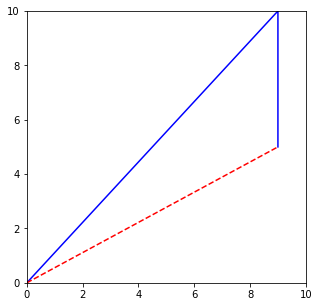

In [119]:
ax = plot_cross(Point(9, 10), Point(9, 5))

## Detecção de interseção entre dois segmentos

In [122]:
# Versão faltando corner case de extremidade de um segmento sobre o outro segmento
def segments_intersect(a1, a2, b1, b2):
    d1 = signum((a2 - a1).cross(b1 - a2))
    d2 = signum((a2 - a1).cross(b2 - a2))
    d3 = signum((b2 - b1).cross(a1 - b2))
    d4 = signum((b2 - b1).cross(a2 - b2))
    return d1 * d2 == -1 and d3 * d4 == -1

# Verifica se p3 está dentro da caixa que contém p1--p2
def in_bounding_box(p1, p2, p3):
    # Note: doesn't work in C++/Java!
    return (min(p1.x, p2.x) <= p3.x <= max(p1.x, p2.x) and
            min(p1.y, p2.y) <= p3.y <= max(p1.y, p2.y))

# Versão completa
def segments_intersect_complete(a1, a2, b1, b2):
    d1 = signum((a2 - a1).cross(b1 - a2))
    d2 = signum((a2 - a1).cross(b2 - a2))
    d3 = signum((b2 - b1).cross(a1 - b2))
    d4 = signum((b2 - b1).cross(a2 - b2))
    return ((d1 * d2 == -1 and d3 * d4 == -1) or
            (d1 == 0 and in_bounding_box(a1, a2, b1)) or 
            (d2 == 0 and in_bounding_box(a1, a2, b2)) or 
            (d3 == 0 and in_bounding_box(b1, b2, a1)) or 
            (d4 == 0 and in_bounding_box(b1, b2, a2)))

def plot_segments_intersect(a1, a2, b1, b2):
    ax = plt.axes()
    intersect = segments_intersect_complete(a1, a2, b1, b2)
    color = ['blue', 'green'][intersect]
    ax.plot([a1.x, a2.x], [a1.y, a2.y], color=color)
    ax.plot([b1.x, b2.x], [b1.y, b2.y], color=color)
    ax.set_ylim(0, 10)
    ax.set_xlim(0, 10)
    return ax

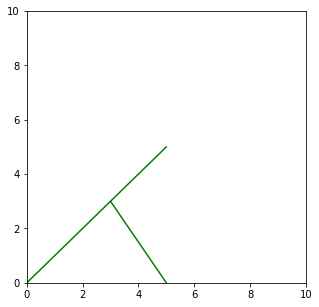

In [123]:
plot_segments_intersect(Point(0, 0), Point(5, 5), Point(5, 0), Point(3, 3))

### Aplicações

* Dado um polígono convexo, dizer se um determinado ponto está dentro ou fora do polígono
    - Follow-up: E se o polígono não for convexo?
* Sem precisar fazer contas, ache um ponto de interseção entre dois segmentos usando nossa função que diz se dois segmentos tem interseção ou não (dica: o que acontece se começamos em uma ponta de um segmento e vamos estendendo o segmento até a outra ponta?)

## Ordenação radial

In [125]:
# Ordena com atan2
# Outra opção: ordenar com produto vetorial (+ quadrantes caso os pontos possam estar em todos os quadrantes)
def radial_sort(ps):
    return sorted(ps, key=lambda p: math.atan2(p.y, p.x))

def plot_radial_sort(ps):
    ax = plt.axes()
    s = radial_sort(ps)
    ax.scatter([p.x for p in ps], [p.y for p in ps])
    ax.scatter([0], [0], color='green')
    for p in ps:
        ax.text(p.x, p.y - 1, str(s.index(p)))
    return ax

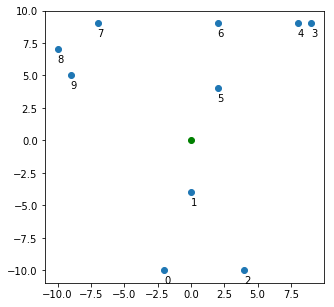

In [115]:
plot_radial_sort([Point.random(-10, 10) for p in range(10)])

### Aplicações

- Convex hull: Graham Scan
- Convex hull: Monotone Chain
- Dados n pontos, determinar o maior número de pontos colineares.
    * Como fazer sem precisar de ponto flutuante?

* Problema - Onion Layers

## Line Sweep

* Detectar se há interseção entre qualquer par de segmentos em $O(n \log n)$
    * Como evitar retas verticais: aplicar uma rotação aleatória no início

* Problema - Fence the vegetables fail
* Problema - Balloon
* Problema - Hide and Seek
* Problema - Asteroid Rangers

### Geometria + DP

* Problema - Arranging tiles
* Problema - Convex Polygon

### Outros

* Erdo and Magnets
* Disjoint Water Supply

# Técnicas de solução de problemas

Primeiro: corrigir `in_bounding_box`

### \#0 - Leia todos os problemas

### \#1 - Faça vários exemplos

* Problema - Jumping Frog
* Problema - Dado um grafo com vértices pretos e brancos, queremos deixar todos pretos com operações do seguinte tipo: escolhemos dois vértices ligados por uma aresta e invertemos a cor dos dois. É possível?

### #2 - Resolva um problema mais fácil primeiro

* Problema - Justified Jungle
* Problema - Weakness and Poorness
* Problema - Devu and his Brother

### #3 - Tente pensar no problema "ao contrário"

* Problema - Buggy ICPC
* Problema - Dado um grafo e uma lista de arestas a serem removidas, dizer para cada consulta se a remoção da aresta gera um novo componente conexo

### #4 - Tente encontrar propriedades na solução, mesmo sem saber chegar nela

* Problema - Galatic Taxes

##### Variação comum: dada uma solução, você consegue simplificá-la de alguma forma sem que ela deixe de ser ótima?

* Dados n pontos no plano, qual é o círculo de menor raio que contém pelo menos k pontos?

### #5 - Toda relação é um grafo

* Problema - Deduction Queries
* Problema - Never Wait for Weights
* Problema - Strange Food Chain
* Problema - Company Organization